### MIIA Pothole Image Classification Challenge

#### The task of this challenge is to build a computer vision system using Machine Learning tools to identify which roads on South Africa contains potholes.

#### This solution uses Keras and a pretrained network (DenseNet201)

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import os,shutil
import tqdm
from tqdm import tqdm
import pandas as pd
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
# Load the data
train_labels = pd.read_csv('train_ids_labels.csv')
test_ids = pd.read_csv('test_ids_only.csv')
sample = pd.read_csv('sample_submission.csv')
images = 'C:/Users/ADEMOLA/Documents/AYOBAMI_DOCUMENT/Computer Programming/Data Science/Machine_Learning+Data_Science_NLP/ZINDI DATA SCIENCE COMPETITIONS/TUNISIA CLASSIFCATION/all_data/'

In [3]:
# Set seed for reproducibility of results
np.random.random.seed(2020)
test_image = []
for i in tqdm(range(test_ids.shape[0])):
    img = image.load_img(images+test_ids['Image_ID'][i]+'.JPG', target_size=(150,150,3))
    img = image.img_to_array(img)
    img /= 255
    test_image.append(img)
test_data = np.array(test_image)

100%|██████████████████████████████████████████████████████████████████████████████| 1650/1650 [00:59<00:00, 27.54it/s]


In [4]:
train_image = []
for i in tqdm(range(train_labels.shape[0])):
    img = image.load_img(images+train_labels['Image_ID'][i]+'.JPG', target_size=(150,150,3))
    img = image.img_to_array(img)
    img /= 255
    train_image.append(img)
train_data = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████| 4026/4026 [02:38<00:00, 25.39it/s]


In [5]:
print('Shape of test data:',test_data.shape)
print('Shape of training data: ',train_data.shape)

Shape of test data: (1650, 150, 150, 3)
Shape of training data:  (4026, 150, 150, 3)


In [6]:
# Transfer Learning
from keras.applications import DenseNet201
conv_base = DenseNet201(weights='densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape=(150,150,3), include_top=False)

In [13]:
# Build the classifier
from keras import models, layers, optimizers, regularizers

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', input_shape=(4*4*1920,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [24]:
train_label = train_labels['Label']
train_label = np.array(train_label)

In [25]:
train_label

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [26]:
train_label.shape

(4026,)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, random_state=0)

In [17]:
# Extract features
conv_pred = conv_base.predict(X_train)

In [18]:
conv_pred.shape

(3019, 4, 4, 1920)

In [19]:
conv_pred2 = conv_base.predict(X_test)
conv_pred2.shape

(1007, 4, 4, 1920)

In [28]:
history = model.fit(conv_pred, y_train, epochs=50, validation_data=(conv_pred2, y_test), batch_size=10)

Train on 3019 samples, validate on 1007 samples
Epoch 1/50
3019/3019 [==============================] - 27s 9ms/step - loss: 1.0071 - acc: 0.7546 - val_loss: 0.3972 - val_acc: 0.8064
Epoch 2/50
3019/3019 [==============================] - 18s 6ms/step - loss: 0.4446 - acc: 0.8271 - val_loss: 0.2773 - val_acc: 0.8709
Epoch 3/50
3019/3019 [==============================] - 18s 6ms/step - loss: 0.4076 - acc: 0.8430 - val_loss: 0.2838 - val_acc: 0.8610
Epoch 4/50
3019/3019 [==============================] - 18s 6ms/step - loss: 0.3746 - acc: 0.8642 - val_loss: 0.2494 - val_acc: 0.8957
Epoch 5/50
3019/3019 [==============================] - 18s 6ms/step - loss: 0.3272 - acc: 0.8735 - val_loss: 0.2505 - val_acc: 0.9017
Epoch 6/50
3019/3019 [==============================] - 19s 6ms/step - loss: 0.2979 - acc: 0.8880 - val_loss: 0.1946 - val_acc: 0.9255
Epoch 7/50
3019/3019 [==============================] - 18s 6ms/step - loss: 0.2902 - acc: 0.8973 - val_loss: 0.2025 - val_acc: 0.9275
Epoch 8

In [56]:
test_loss, test_acc = model.evaluate(conv_pred2,y_test)
print('Accuracy on test set is :{:.2f}'.format(test_acc))

1007/1007 [==============================] - 1s 791us/step
Accuracy on test set is :0.94


In [30]:
hi = model.predict(conv_pred2)
hi_1 = hi.round()

In [31]:
from sklearn.metrics import mean_squared_error
print('Error is:', np.sqrt(mean_squared_error(hi_1, y_test)))

Error is: 0.25012410028066373


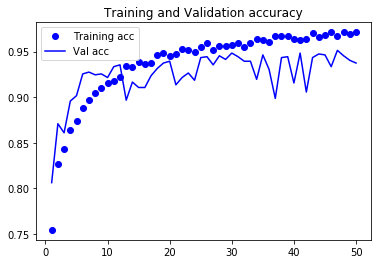

In [32]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Val acc')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.show()

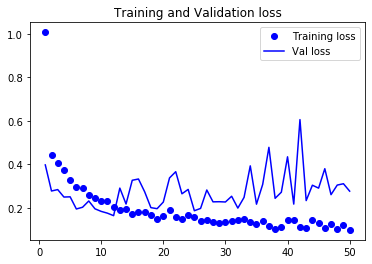

In [33]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Val loss')
plt.title('Training and Validation loss')
plt.legend(loc='best')
plt.show()

In [34]:
conv_pred3 = conv_base.predict(test_data)

In [43]:
conv_pred3.shape

(1650, 4, 4, 1920)

In [44]:
pred = model.predict(conv_pred3)

In [45]:
new_pred = model.predict_classes(conv_pred3)

In [52]:
# Submission file
sub = pd.DataFrame()
sub['Image_ID'] = test_ids['Image_ID']
sub['Label'] = new_pred

In [53]:
sub.to_csv('Solution.csv', index=False)